<a href="https://colab.research.google.com/github/EChilin5/StockGraph/blob/master/Stock_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime


In [134]:

START_DATE ='2020-10-01'
END_DATE = str(datetime.now().strftime('%Y-%m-%d'))

START_DATE_previous ='2019-10-01'
End_Date_previous = '2019-12-04'

START_DATE_previous_2 ='2018-10-01'
End_Date_previous_2 = '2018-12-04'

Chewy = 'CHWY'
Abbvie = 'ABBV'
Sony = 'SNE'
Target = 'TGT'
three_mmm = 'MMM'
Micro = 'AMD'

<h1>Clean Data<h1>

In [135]:
def create_table(stock_data, ticker):
  stats = get_stats(stock_data)
  plt.subplots(figsize=(12,8))
  plt.plot(stock_data, label=ticker)
  plt.plot(stats['short_rolling'], label='20 days rolling')
  plt.plot(stats['long_rolling'], label='200 days rolling')
  plt.xlabel('Date')
  plt.ylabel('Adj Close (p)')
  plt.legend()
  plt.title('Stock Price Over Time')
  plt.style.use('dark_background')
  plt.show()


def get_stats(stock_data):
  return {
      'last': np.mean(stock_data.tail(1)),
      'short_mean': np.mean(stock_data.tail(20)),
      'long_mean': np.mean(stock_data.tail(200)),
      'short_rolling': stock_data.rolling(window = 20).mean(),
      'long_rolling': stock_data.rolling(window = 200).mean()
  }

def clean_data(stock_data, col ):
  weekdays = pd.date_range(start=START_DATE, end=END_DATE)
  clean_data = stock_data[col].reindex(weekdays)
  return clean_data.fillna(method='ffill')

def clean_data2(stock_data, col ):
  weekdays = pd.date_range(start=START_DATE_previous, end=End_Date_previous)
  clean_data = stock_data[col].reindex(weekdays)
  return clean_data.fillna(method='ffill')

def clean_data3(stock_data, col ):
  weekdays = pd.date_range(start=START_DATE_previous_2, end=End_Date_previous_2)
  clean_data = stock_data[col].reindex(weekdays)
  return clean_data.fillna(method='ffill')



<h1>Fetch Data from Yahoo Finance Api</h1>

In [136]:
def getData(ticker):
  try:
    stock_data = data.DataReader(ticker, 'yahoo',START_DATE,END_DATE)
    adj_close= clean_data(stock_data, 'Adj Close')
    #print(getData(adj_close))
    create_table(adj_close, ticker)
  except RemoteDataError:
    print('no data for {t}'.format(t=ticker))

def getData_previous(ticker):
  try:
    stock_data = data.DataReader(ticker, 'yahoo',START_DATE_previous,End_Date_previous)
    adj_close= clean_data2(stock_data, 'Adj Close')
    #print(getData(adj_close))
    create_table(adj_close, ticker)
  except RemoteDataError:
    print('no data for {t}'.format(t=ticker))

def getData_previous_2(ticker):
  try:
    stock_data = data.DataReader(ticker, 'yahoo',START_DATE_previous_2,End_Date_previous_2)
    adj_close= clean_data3(stock_data, 'Adj Close')
    #print(getData(adj_close))
    create_table(adj_close, ticker)
  except RemoteDataError:
    print('no data for {t}'.format(t=ticker))


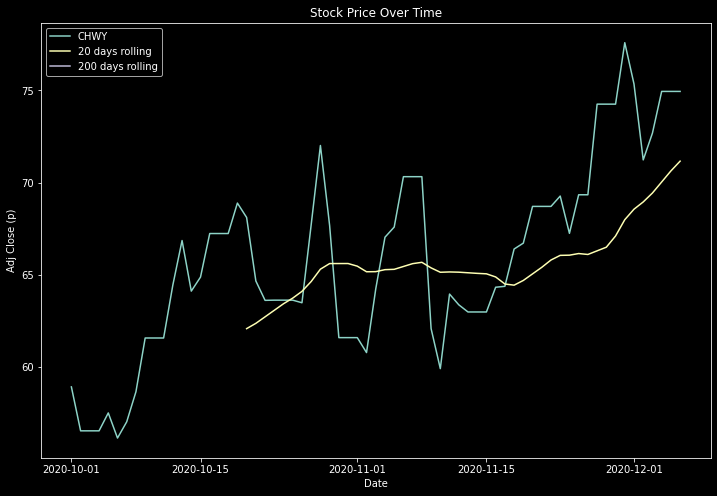

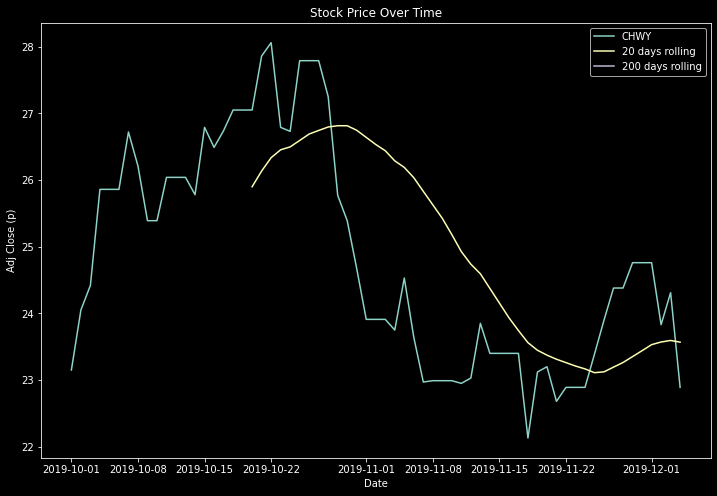

In [137]:
getData(Chewy)
getData_previous(Chewy)


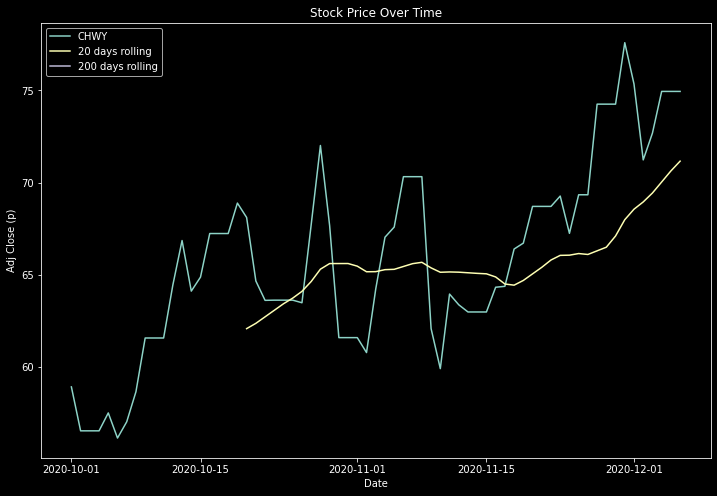

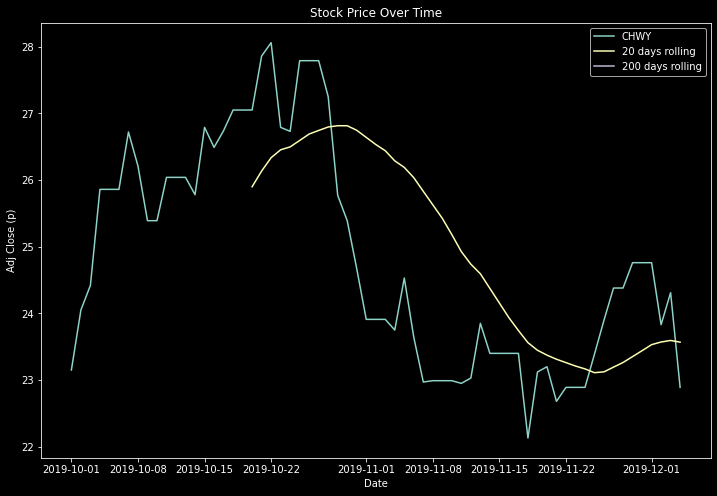

In [138]:
getData(Chewy)
getData_previous(Chewy)


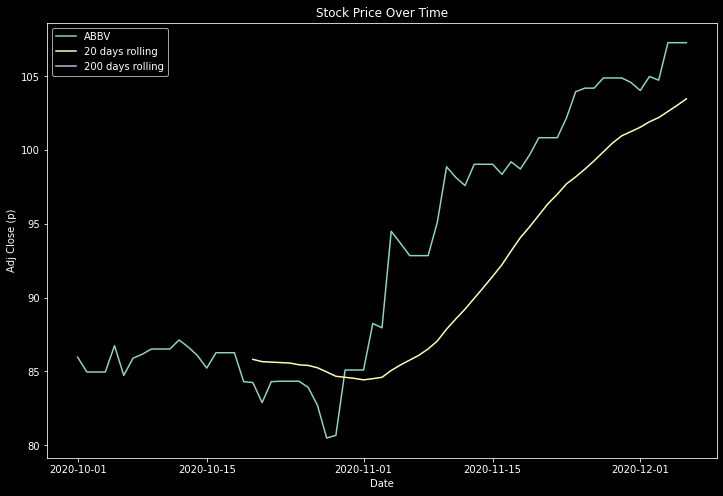

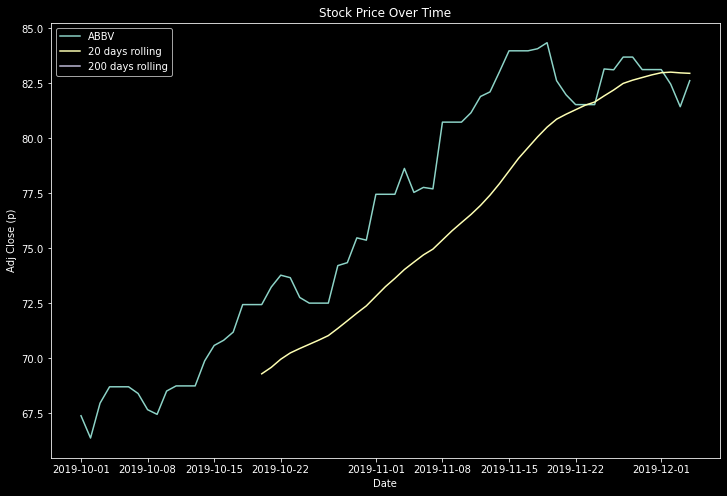

In [139]:
getData(Abbvie)
getData_previous(Abbvie)


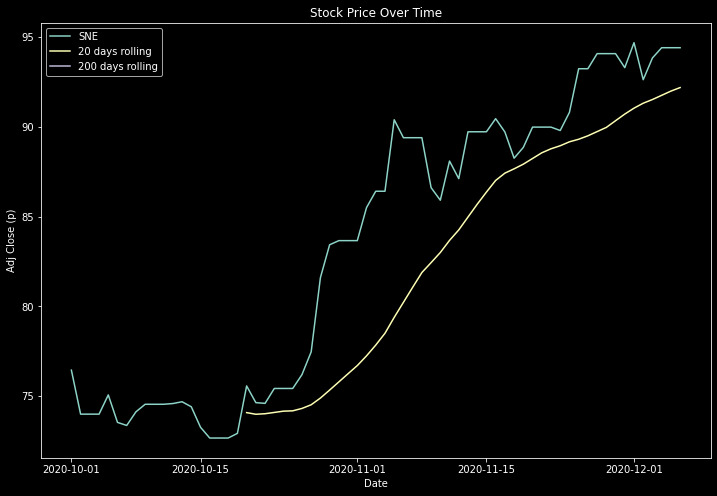

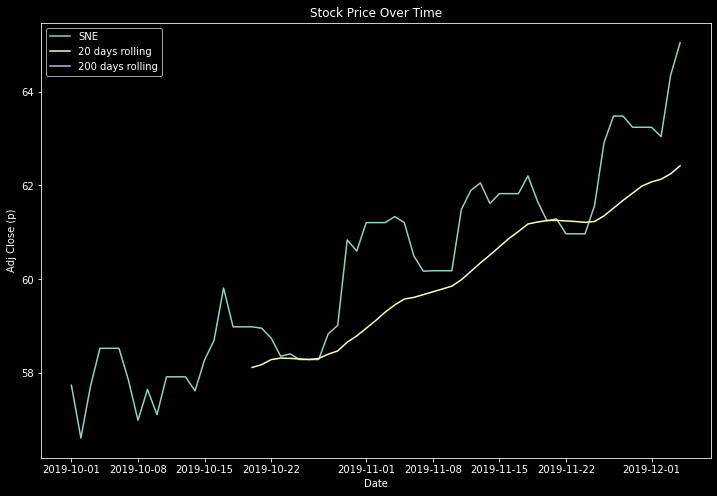

In [140]:
getData(Sony)
getData_previous(Sony)


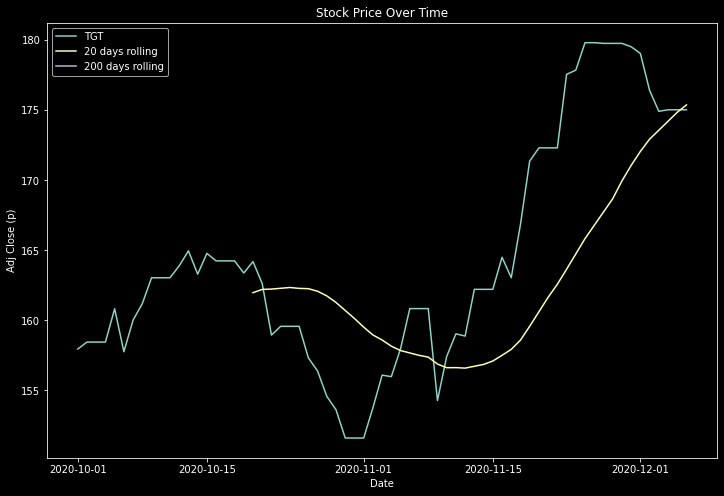

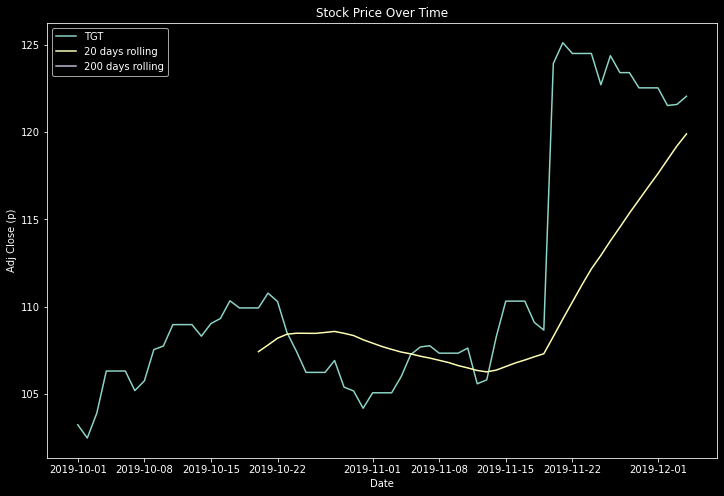

In [141]:
getData(Target)
getData_previous(Target)


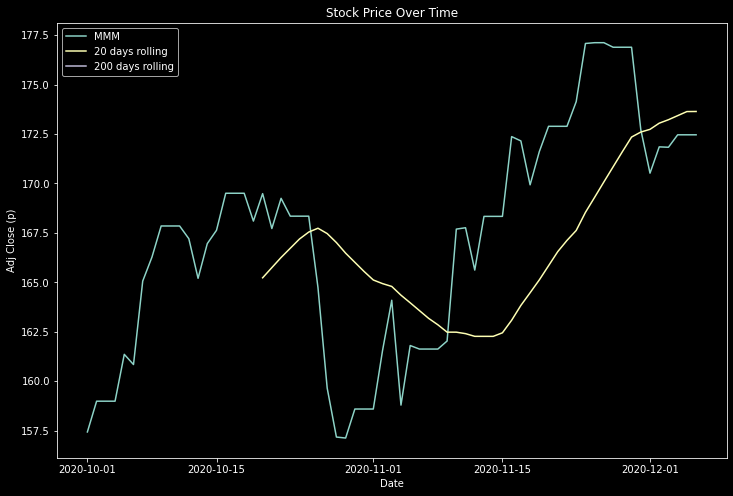

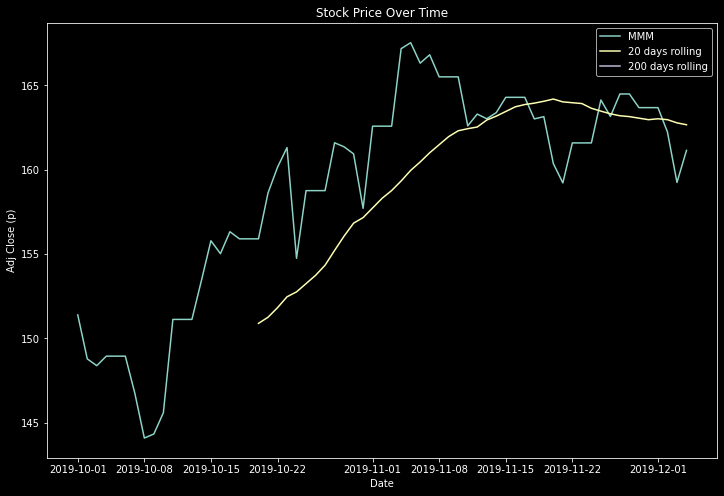

In [142]:
getData(three_mmm)
getData_previous(three_mmm)


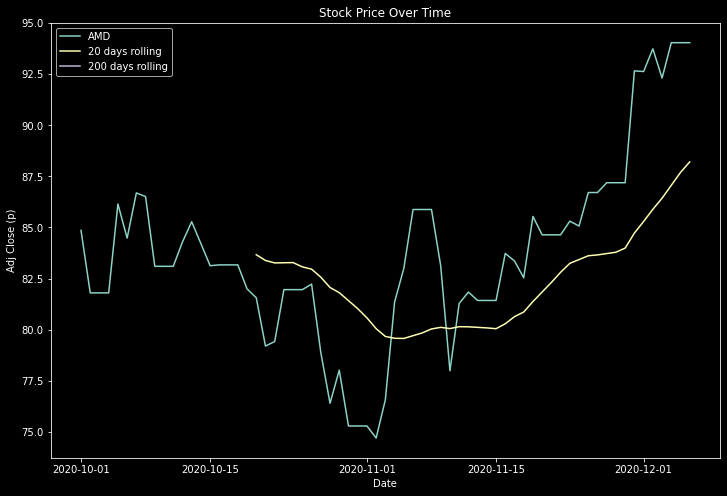

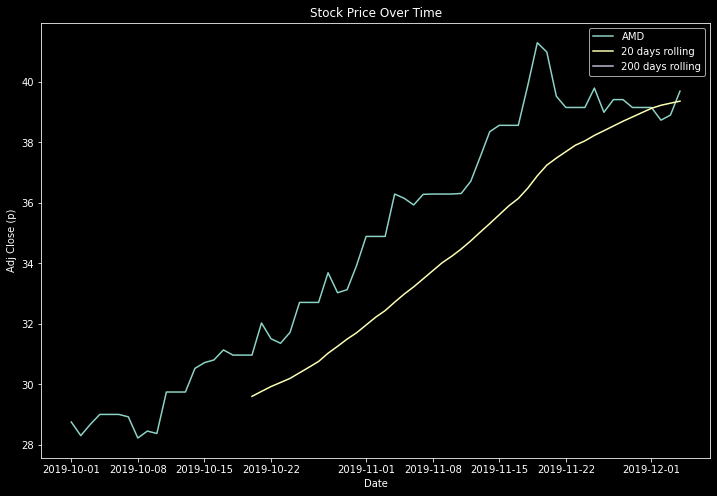

In [143]:
getData(Micro)
getData_previous(Micro)
